# TSF- TASK 1
__Prediction using Supervised ML__ <br>
__Problem Statement - Predict the marks of student based on his/her number of hours of study.__ <br>
Author: PRIYA N V


1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2. Reading data


In [3]:

url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Since the above data has only two variables , we plot the data to see if they have a linear relation.

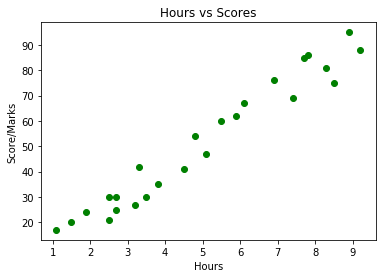

In [18]:
# Simple line plot 
x=data['Hours']
y=data['Scores']

# Plot
plt.scatter(x,y,c='green')

# Decorate
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Score/Marks')

plt.show()

__3. Prepare Data__

Split the data into dependent and independent variables. Variable Y usually contains the dependant attribute.


In [7]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

Now, split the data into training and test set. Here test set size is considered 0.2.{ which indicates 20% of samples will be considered as the test set}

In [8]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

__4.Training the selected algorithm__

Since our dataset contains only 2 variables, and from our plot we can conclude that the variables i.e,Hours and Marks have a linear relationship , our choice of algorithm is Simple Linear Regression.

In [11]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(X_train, y_train) 

print("Model trained on dataset.")

Model trained on dataset.


In [12]:
# The coefficients
print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)

Coefficients:  [9.91065648]
Intercept:  2.018160041434683


__5.Plotting Outputs__

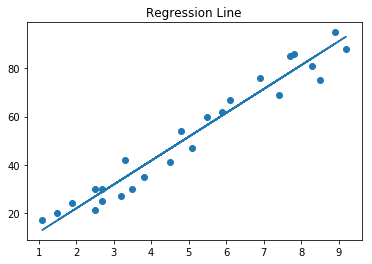

In [16]:
# Plotting the regression line
l = model.coef_*x+model.intercept_

# Plotting for the test data
plt.title('Regression Line')
plt.scatter(x, y)
plt.plot(x, l);
plt.show()


__6.Make Predictions __<br>
Q:What will be predicted score if a student studies for 9.25 hrs/ day?

In [18]:
y_pred = model.predict(X_test)

In [24]:
qa=9.25
print('Hours=',qa)
print("Predicted Marks= {}".format((model.predict(qa))[0]))

Hours= 9.25
Predicted Marks= 93.69173248737538


The above result is the prediction made the model for the above question.

__7.Evaluation__<br>
We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.<br>

Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.<br>

Root Mean Squared Error (RMSE): This is the square root of the Mean Square Error.<br>

R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [26]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_pred , y_test) )

Mean absolute error: 4.18
Residual sum of squares (MSE): 21.60
R2-score: 0.95


We can see that the above model has R2 score of 0.95 which means the model has performed well for this task.